<a href="https://colab.research.google.com/github/hungcuongthan/ML-Projects/blob/main/ANN/MNIST%20ANN%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tf.__version__

'2.5.0'

In [3]:
#import mnist dataset

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()


#Scale data
x_train, x_test = x_train/255.0,x_test/255.0
print("x_train.shape", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)


In [4]:
#build the ann model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation= "softmax")
])

In [5]:
#Compile the mode

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

r = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.9145 - val_loss: 0.1334 - val_accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1393 - accuracy: 0.9585 - val_loss: 0.1014 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.0841 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.0814 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9773 - val_loss: 0.0814 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9788 - val_loss: 0.0692 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0718 - val_accuracy:

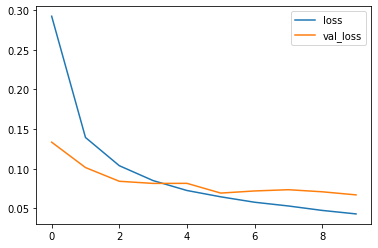

In [6]:
#plot loss per iteration (epoch)

plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

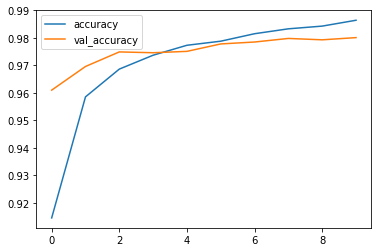

In [7]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [8]:
#Evaluate the model by test daa
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9801
[0.06687913835048676, 0.9800999760627747]


### Examine the error cases (digits)



Confusion matrix, without normalization
[[ 971    0    0    1    1    1    3    1    2    0]
 [   0 1122    3    1    0    1    2    0    6    0]
 [   4    1 1011    3    3    0    2    5    3    0]
 [   0    0    1  997    0    4    0    3    3    2]
 [   0    0    3    1  956    0    3    2    2   15]
 [   2    0    0    7    1  874    2    1    4    1]
 [   3    3    0    2    2    3  945    0    0    0]
 [   1    2    8    3    0    1    0 1004    2    7]
 [   2    0    2    8    3    4    3    6  942    4]
 [   4    3    0    7    6    3    0    6    1  979]]


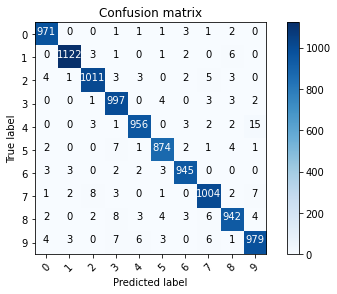

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

We can see there are many examples of 7s being mistaken to 2, 8s to 3 and so on, let's check those falsely labeled cases to see if they are reasonable

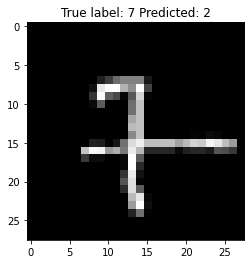

In [12]:
# p_test = model.predict(x_test).argmax(axis=1)
# cm = confusion_matrix(y_test, p_test)
# plot_confusion_matrix(cm, list(range(10)))

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));


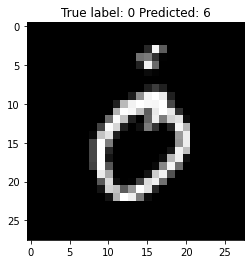

In [13]:
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
